In [1]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib_venn import venn2


%matplotlib inline

In [2]:
sherlock_df = pd.read_csv('../datasets/clean_sherlock.csv', index_col=0)

In [3]:
elementary_df = pd.read_csv('../datasets/clean_elementary.csv', index_col=0)

### Removing additional null values due to cleaning of stop words. 

In [4]:
sherlock_df.isnull().sum()

lemmatized    17
dtype: int64

In [5]:
sherlock_df.dropna(inplace = True)

In [6]:
sherlock_df.isnull().sum()

lemmatized    0
dtype: int64

In [7]:
elementary_df.isnull().sum()

lemmatized    1
dtype: int64

In [8]:
elementary_df.dropna(inplace = True)

In [9]:
elementary_df.isnull().sum()

lemmatized    0
dtype: int64

## Exlporing words in the subreddits

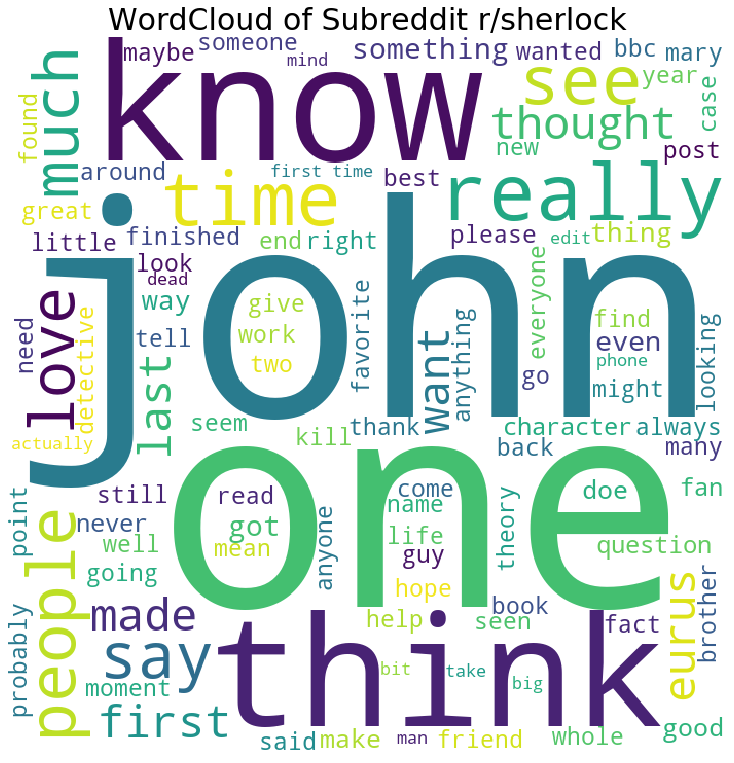

In [10]:
# word cloud of 
text = ' '
 
# iterate through the csv file 
for x in sherlock_df.lemmatized: 
    # typecaste each value to string 
    x = str(x) 
    # split the value 
    values = x.split() 
    for words in values: 
        text = text + words + ' '
    
cloud = WordCloud(max_words= 100,
                      width = 700, 
                      height = 700,
                      background_color ='white',
                    
                      contour_width=5, 
              
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10,20), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off");
plt.tight_layout(pad = 0)
plt.title('WordCloud of Subreddit r/sherlock',fontsize=30)    
plt.savefig('../images/cloud_s.png')

Words that stand out are 'eurus', 'john', 'lestrade', 'kill',' brother','mary' and 'dead' . 

'John' refers to John Watson, one of the main characters of the show and unsurprisingly the most frequently found word based on its word cloud size. The other names are the recurring supporting characters. 

Interestingly 'brother' appears often as it most likely refers to another supporting character Mycroft Holmes, Sherlock's brother. His name does not appear here as it was removed as a stopword.

The word 'kill' likely refers to a shocking finale episode when Sherlock had to shoot a villian. 

'Dead' likely refers to the period when Sherlock pretended to be dead 

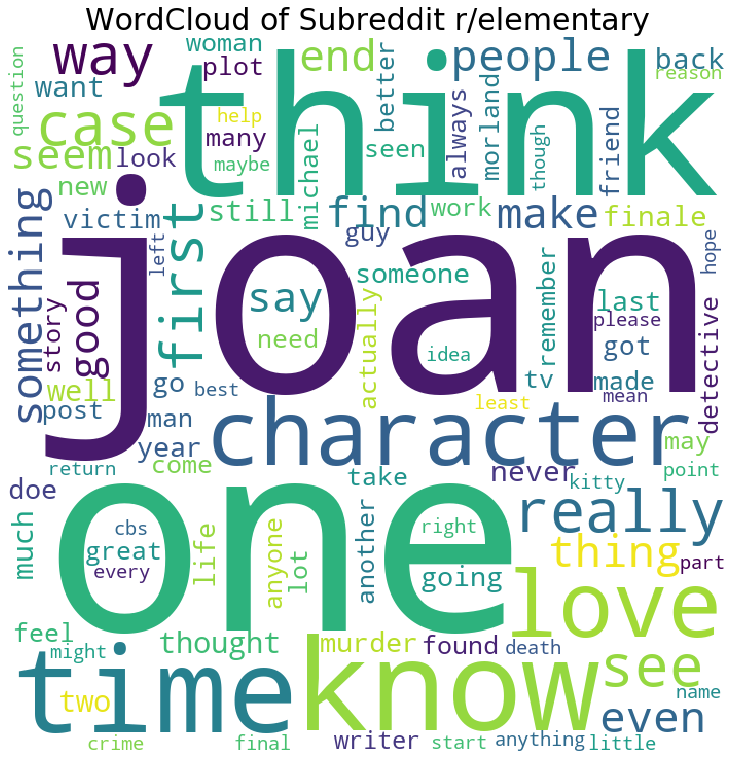

In [11]:
text = ' '
 
# iterate through the csv file 
for x in elementary_df.lemmatized: 
    # typecaste each value to string 
    x = str(x) 
    # split the value 
    values = x.split() 
    for words in values: 
        text = text + words + ' '
    
cloud = WordCloud(max_words= 100,
                      width = 700, 
                      height = 700,
                      background_color ='white',
                    
                      contour_width=5, 
              
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10,20), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off");
plt.tight_layout(pad = 0)
plt.title('WordCloud of Subreddit r/elementary',fontsize=30) 
plt.savefig('../images/cloud_e.png')

Words that stand out are 'joan', 'michael', 'morland', 'case',' crime' and 'dead' . 

'Joan' refers to Joan Watson, one of the main characters of the show and unsurprisingly the most frequently found word based on its word cloud size. The other names are the recurring supporting characters. 

Interestingly 'case' and 'crime'appears more often in this subreddit than the other, most likely due to the show having more episodes on crime cases.

 'Dead' likely refers to the period when Sherlock pretended to be dead. A common deux ex machina for both shows.

## Find the top 20 words for both subreddits

In [12]:
# Instantiating the count vectorizer

cvec_s = CountVectorizer(min_df=2,ngram_range=(1,2))
cvec_e = CountVectorizer(min_df=2,ngram_range=(1,2))

# min_df=2, a word must occur in at least two documents from the corpus.  
# ngram_range=(1,2),captures every 1-gram and every 2-gram

# Fit transforming the data

sherlock_cvec = cvec_s.fit_transform(sherlock_df['lemmatized'])
elementary_cvec = cvec_e.fit_transform(elementary_df['lemmatized'])



In [13]:
# Save transformed data to a dataframe

sherlock_df_cvec = pd.DataFrame(sherlock_cvec.toarray(), 
                                      columns = cvec_s.get_feature_names())

elementary_df_cvec = pd.DataFrame(elementary_cvec.toarray(), 
                                      columns = cvec_e.get_feature_names())

In [14]:
# Getting the top 20 frequent words

top_sherlock = pd.DataFrame(sherlock_df_cvec.sum(axis=0).sort_values(ascending = False).head(20))
top_elementary = pd.DataFrame(elementary_df_cvec.sum(axis=0).sort_values(ascending = False).head(20))

### Graphs of the top 20 words for both subreddits

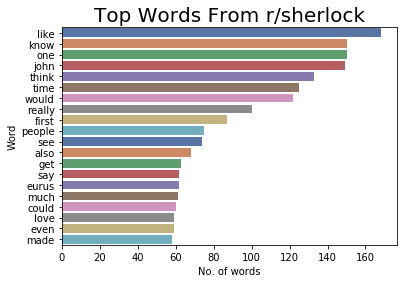

In [15]:
sns.barplot(x = 0, y= top_sherlock.index, data = top_sherlock, palette = 'deep')


plt.title(f'Top Words From r/sherlock', size = 20)
plt.xlabel('No. of words', size = 10)
plt.ylabel('Word', size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10);
plt.savefig('../images/top_s.png')

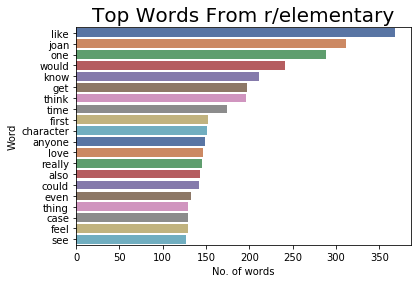

In [16]:

sns.barplot(x = 0, y= top_elementary.index, data = top_elementary, palette = 'deep')


# Setting the graph parameters
plt.title(f'Top Words From r/elementary', size = 20)
plt.xlabel('No. of words', size = 10)
plt.ylabel('Word', size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10);
plt.savefig('../images/top_e.png')

The words 'like' and 'love' appear in the top 20 words for both subthreads, indicating the viewers liked both shows. 
Although love appeared higher in rank in Elementary which may indicate a stronger affection for the show.

The 'eurus' which was the name of Sherlock's sister, is the only supporting character name that appeared in the top 20 for either shows which can mean viewers found topics related to her interesting and hence discussed about her more. This may mean that elementary's supporting characters like strong character development as compared to sherlock.

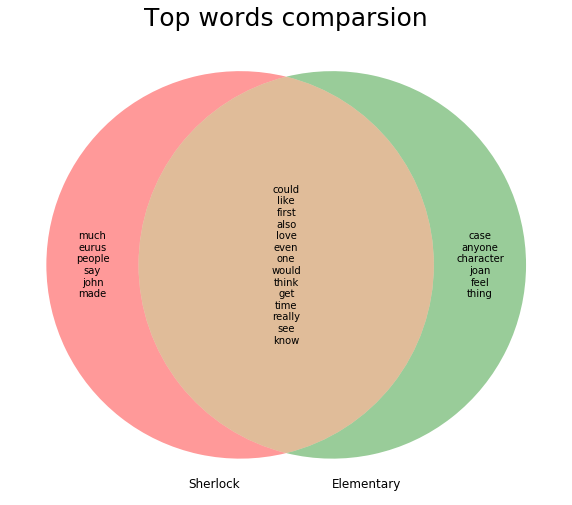

In [17]:
plt.figure(figsize=(10,10))
plt.title('Top words comparsion',fontsize=25)

set_s = set(top_sherlock.index)
set_e = set(top_elementary.index)

v = venn2([set_s,set_e],set_labels=['Sherlock','Elementary'])


v.get_label_by_id('100').set_text('\n'.join(map(str,set_s-set_e)))
v.get_label_by_id('110').set_text('\n'.join(map(str,set_s&set_e)))
v.get_label_by_id('010').set_text('\n'.join(map(str,set_e-set_s)))

plt.savefig('../images/venn.png')

There are 14 common words from the top 2 words from both subrredits. This is unsurprising considering how similar both shows are. The issue is whether we are able to build a model that can classify the subreddits better than the baseline.

In [18]:
# Setting target variable

In [19]:
sherlock_df['target']=0

In [20]:
elementary_df['target']=1


In [21]:
# combine both dataframes into 1 

In [22]:
combo_redd = pd.concat([sherlock_df, elementary_df], axis=0)

In [23]:
combo_redd.reset_index(drop=True, inplace=True)

In [24]:
pd.DataFrame(combo_redd).to_csv('../datasets/combo_redd.csv')

## References

https://www.geeksforgeeks.org/generating-word-cloud-python/

https://stackoverflow.com/questions/54603761/is-it-possible-to-display-the-venn-diagram-within-a-universal-set